<h1>Classification Using Naive Bayes Algorithm</h1>

For this exercise we are going to work with a data set that has info about a MSM,and it´s has a classification too, this classification are: SPAM or HAM.

this Data Set is available in this direction: https://www.kaggle.com/team-ai/spam-text-message-classification.

first of all, lets download the file from the direction above, and lets upload to the work space

In [1]:
df<- read.csv("/resources/MyData/MyRModels/NaiveBayes/SPAM text message 20170820 - Data.csv",stringsAsFactors = FALSE)

we goin to see the structure of the file first, there are 5572 observations, with 2 features, category and Message. in the category feature there are to classes: ham and spam. the message features has the raw SMS text.

In [2]:
str(df)

'data.frame':	5572 obs. of  2 variables:
 $ Category: chr  "ham" "ham" "spam" "ham" ...
 $ Message : chr  "Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..." "Ok lar... Joking wif u oni..." "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question("| __truncated__ "U dun say so early hor... U c already then say..." ...


Now, category is character vector, and we have to cast this to factor, because is a categorical variable

In [3]:
df$Category<- as.factor(df$Category)
str(df$Category)#lets check if the cast is ok
table(df$Category)# lets check the distribution of the factor in the data

 Factor w/ 2 levels "ham","spam": 1 1 2 1 1 2 1 1 2 2 ...



 ham spam 
4825  747 

Now we hace to preparete and clean the data, because we have to elminate the puntuation signs, the words that connects phrases like "and", "but", and "or". also, we have to eliminate the numbers. for this porpuse we are goin to use text mining package titled tm.

In [4]:
install.packages("tm")
library(tm)

also installing the dependencies ‘NLP’, ‘slam’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: NLP


the first step is creating a "corpus", this corpus will contain the words.
for this we use the function VCorpus(), this fucntions is for create a object thats stores in memory, and we goin to need the function VectorSource(), this function reads the info from the df and put´s in the Vcorpus() function  

In [5]:
sms_corpus <- VCorpus(VectorSource(df$Message))
print(sms_corpus)#lets check the content
inspect(sms_corpus[1:2])#this is a complex list, so we can manipulate like a list
as.character(sms_corpus[[1]])#if you want to see a message, you hae to use the as.character function

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 5572
<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 2

[[1]]
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 111

[[2]]
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 29



[1] "Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."

ok, now lets start with dividing the text in individual words. we are goin to do this by cleaning the text, standardization the words by removing punctuation and other characters that clutter the result, and put all the words in lowercase 

In [6]:
sms_corpus_clean <- tm_map(sms_corpus,content_transformer(tolower))
as.character(sms_corpus[[1]])#lets compare the result
as.character(sms_corpus_clean[[1]])

[1] "Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."

[1] "go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat..."

In [7]:
sms_corpus_clean <- tm_map(sms_corpus_clean, removeNumbers)#remove the numbers
sms_corpus_clean <- tm_map(sms_corpus_clean,removeWords, stopwords())# during the cleaning process, the Stop wors like to, and, but, and or
sms_corpus_clean <- tm_map(sms_corpus_clean, removePunctuation)#remove the punctuation

so, the next step is to temming the words, this mean, that the words are transform to they root form. for this we need the SnowballC library

In [8]:
install.packages("SnowballC")
library(SnowballC)
sms_corpus_clean <- tm_map(sms_corpus_clean, stemDocument)
sms_corpus_clean <- tm_map(sms_corpus_clean, stripWhitespace)#elminate white spaces


Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [9]:
as.character(sms_corpus_clean[1:3])#check the result of the cleaning the data

[1] "list(list(content = \"go jurong point crazi avail bugi n great world la e buffet cine got amor wat\", meta = list(author = character(0), datetimestamp = list(sec = 4.00197243690491, min = 56, hour = 21, mday = 22, mon = 7, year = 119, wday = 4, yday = 233, isdst = 0), description = character(0), heading = character(0), id = \"1\", language = \"en\", origin = character(0))), list(content = \"ok lar joke wif u oni\", meta = list(author = character(0), datetimestamp = list(sec = 4.00227952003479, min = 56, \n    hour = 21, mday = 22, mon = 7, year = 119, wday = 4, yday = 233, isdst = 0), description = character(0), heading = character(0), id = \"2\", language = \"en\", origin = character(0))), list(content = \"free entri wkli comp win fa cup final tkts st may text fa receiv entri questionstd txt ratetc appli s\", meta = list(author = character(0), datetimestamp = list(sec = 4.00241732597351, min = 56, hour = 21, mday = 22, mon = 7, year = 119, wday = 4, yday = 233, isdst = 0), description = character(0), heading = character(0), \n    id = \"3\", language = \"en\", origin = character(0))))"
[2] "list()"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
[3] "list()"

well, in this lap, lets separate the words, via tokenization process. the result set is save at a Document Term Matrix (DTM) in which rows indicate documents (SMS messages) and columns indicate terms (words).

In [10]:
sms_dtm <- DocumentTermMatrix(sms_corpus_clean)
str(sms_dtm)

List of 6
 $ i       : int [1:42593] 1 1 1 1 1 1 1 1 1 1 ...
 $ j       : int [1:42593] 212 395 770 772 1038 1245 2314 2350 2953 4289 ...
 $ v       : num [1:42593] 1 1 1 1 1 1 1 1 1 1 ...
 $ nrow    : int 5572
 $ ncol    : int 6605
 $ dimnames:List of 2
  ..$ Docs : chr [1:5572] "1" "2" "3" "4" ...
  ..$ Terms: chr [1:6605] "…thank" "‘ll" "‘re" "‘ve" ...
 - attr(*, "class")= chr [1:2] "DocumentTermMatrix" "simple_triplet_matrix"
 - attr(*, "weighting")= chr [1:2] "term frequency" "tf"


Now, lets preparete our training(75%=4179) and test (25%=1393) data set.

In [39]:
sms_dtm_train <- sms_dtm[1:4179, ]
sms_dtm_test <- sms_dtm[4180:5572, ]
sms_train_labels <- df[1:4179, 1]#labels
sms_test_labels <- df[4180:5572, 1]

lets see the word cloud

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


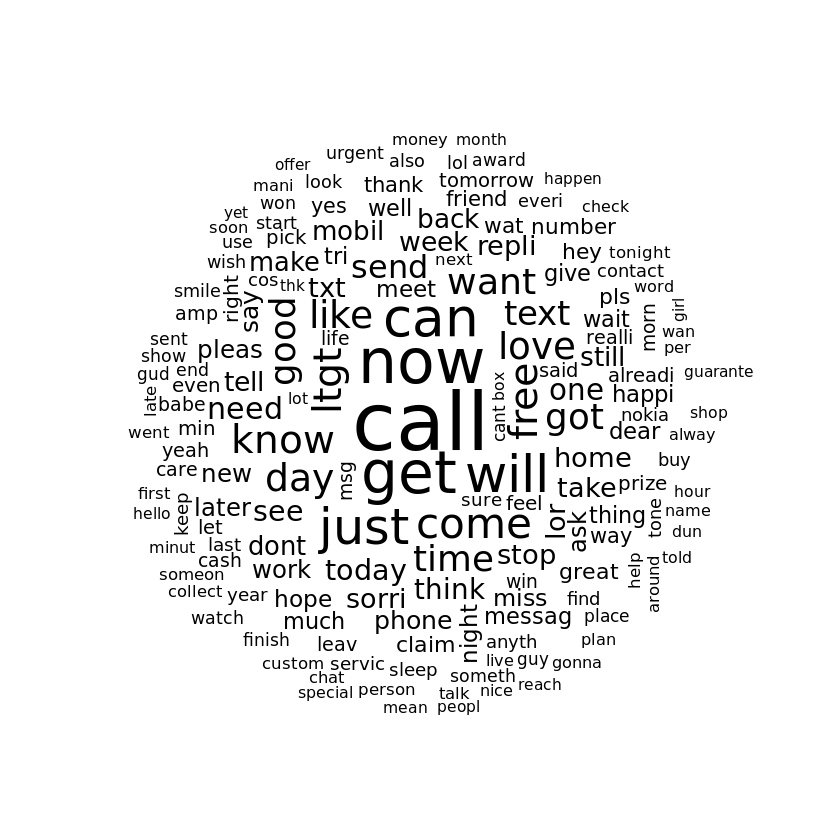

In [27]:
install.packages("wordcloud")
library(wordcloud)
wordcloud(sms_corpus_clean, min.freq = 50, random.order = FALSE)

OK, for training the model, the are a few steps to do:
1. Cast the sparse matrix to Data Frame
2. Reduce the sizes of the matrix, because the are words than just appear lest than 5% of the times, so this kind of words do not help t train well the model.
3. find the frequent words, and save them in a character vector.

In [28]:
sms_freq_words <- findFreqTerms(sms_dtm_train, 5)#the frequency is upset to 5 in each msm
str(sms_freq_words)

 chr [1:1161] "£wk" "abiola" "abl" "abt" "accept" "access" "account" ...


In [29]:
sms_dtm_freq_train<- sms_dtm_train[ , sms_freq_words]#we filter the DTM with the words in character vector we made
sms_dtm_freq_test <- sms_dtm_test[ , sms_freq_words]


Because the Naive Bayes works with categorical data, and the DTM have numbers, we have to cast the numbers to a categorical form (yes or no)

In [30]:
nrow(sms_dtm_freq_train)

[1] 4179

In [31]:
convert_counts <- function(x) {x <- ifelse(x > 0, "Yes", "No")}#function to cast numeric data to categorical data
sms_train <- apply(sms_dtm_freq_train, MARGIN = 2,convert_counts)#apply helps to apply the function in each column (Margin=2)
sms_test <- apply(sms_dtm_freq_test, MARGIN = 2,convert_counts)

Now, lets started with the training the model, remember that this model works with condicionality probability, and it will indicate us if a MSM is a
Spam or ham.

In [40]:
nrow(sms_train)
nrow(sms_train_labels)

[1] 4179

NULL

In [38]:
install.packages("e1071")
library(e1071)#this library has the function to train the model
sms_classifier <- naiveBayes(sms_train, sms_train_labels)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


By now, we already have the model,lets evaluate the performance

In [43]:
sms_test_pred <- predict(sms_classifier, sms_test)#evaluates the predictions vs the true labels
install.packages("gmodels")
library(gmodels)
CrossTable(sms_test_pred, sms_test_labels,
prop.chisq = FALSE, prop.t = FALSE,
dnn = c('predicted', 'actual'))

also installing the dependencies ‘gtools’, ‘gdata’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done



 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|-------------------------|

 
Total Observations in Table:  1393 

 
             | actual 
   predicted |       ham |      spam | Row Total | 
-------------|-----------|-----------|-----------|
         ham |      1202 |        20 |      1222 | 
             |     0.984 |     0.016 |     0.877 | 
             |     0.993 |     0.110 |           | 
-------------|-----------|-----------|-----------|
        spam |         9 |       162 |       171 | 
             |     0.053 |     0.947 |     0.123 | 
             |     0.007 |     0.890 |           | 
-------------|-----------|-----------|-----------|
Column Total |      1211 |       182 |      1393 | 
             |     0.869 |     0.131 |           | 
-------------|-----------|-----------|-----------|

 
